In [2]:
import os
import sys
import nibabel, argparse, matplotlib, sys
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from skimage import measure
from skimage import data
from skimage.transform import rescale
from mpl_toolkits.mplot3d import Axes3D
from pylab import get_cmap

ct_filename = "?.nii"
liver_mask_file = "?.ids"
tumor_mask_file = "?.ids"

In [3]:
ct = nibabel.load(ct_filename)
ct = nibabel.as_closest_canonical(ct
ct_dimx, ct_dimy, ct_dimz = ct.header['pixdim'][1:4]
ct_units = ct.header['xyzt_units']
ct_data = np.asarray(ct.dataobj).astype(dtype='float64')

# Orient the images along the same axis as the binary masks.
ct_data = ct_data[::-1,:,:]



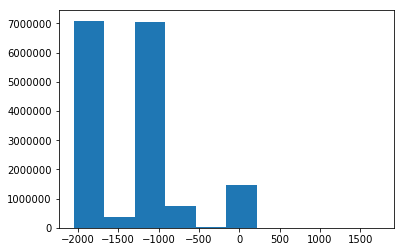

In [4]:
flat_ct= ct_data.flatten()
plt.hist(flat_ct)
plt.show()



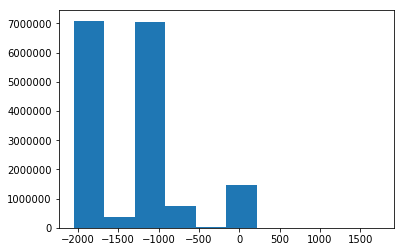

In [5]:

max_ct = np.amax(ct_data)
min_ct = np.amin(ct_data)
range_ct = max_ct-min_ct

ct_data = ct_data
flat_ct= ct_data.flatten()
plt.hist(flat_ct)
plt.show()


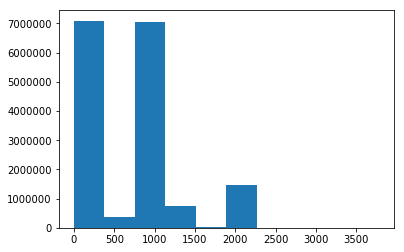

In [6]:
ct_data= (-1* min_ct) + ct_data
flat_ct= ct_data.flatten()
plt.hist(flat_ct)
plt.show()

In [7]:
ct_data= ct_data -1024



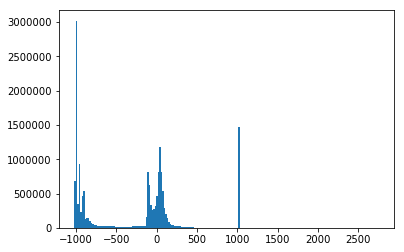

In [8]:
flat_ct= ct_data.flatten()
plt.hist(flat_ct, bins=200)
plt.show()

In [11]:
with open(liver_mask_file, 'rb') as f:
    liver = f.read()
    liver = np.fromstring(liver, dtype='uint8')
    liver = np.reshape(liver, (ct_data.shape[2], ct_data.shape[1], ct_data.shape[0]))
    liver = np.transpose(liver, (2,1,0))
    liver = liver[:,::-1,:]
    liver[liver > 0] = 1

with open(tumor_mask_file, 'rb') as f:
    tumor = f.read()
    tumor = np.fromstring(tumor, dtype='uint8')
    tumor = np.reshape(tumor, (ct_data.shape[2], ct_data.shape[1], ct_data.shape[0]))
    tumor = np.transpose(tumor, (2,1,0))
    tumor = tumor[:,::-1,:]
    tumor[tumor > 0] = 1

In [12]:
 x, y, z = ct_data.shape 
    
# Everything except the tumor.
diff_without_tumor = np.copy(ct_data)
diff_without_tumor[tumor > 0] = np.amin(ct_data)

# Just the tumor.
just_tumor = np.copy(ct_data)
just_tumor[tumor <= 0] = np.amin(ct_data)

# Just the liver.
just_liver = np.copy(ct_data)
just_liver[liver <= 0] = np.amin(ct_data)



In [17]:
# Calculate the liver volume.
liver_volume = np.sum(liver) * ct_dimx * ct_dimy * ct_dimz
is_in_mm = ct_units == 2 or liver_volume > 10000
if is_in_mm: # 2 is the code for millimeter, we convert to cubic centimeters.
    liver_volume /= 1000
# Calculate the tumor volume.
tumor_volume = np.sum(tumor) * ct_dimx * ct_dimy * ct_dimz
if is_in_mm: # 2 is the code for millimeter, we convert to cubic centimeters.
    tumor_volume /= 1000
    



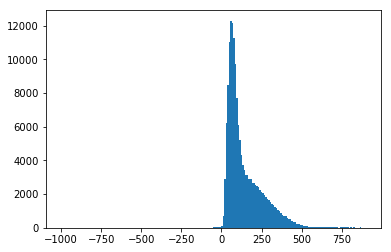

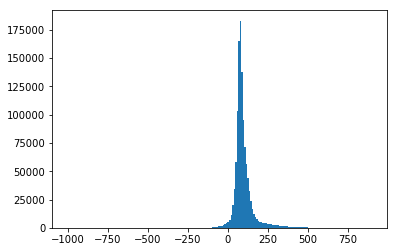

In [18]:
flat_tumor= just_tumor.flatten()
plt.hist(flat_tumor, range=[-1000,900], bins=200)
plt.show()

flat_liver= just_liver.flatten()
plt.hist(flat_liver, range=[-1000,900], bins=200)
plt.show()

In [20]:
threshold = 67

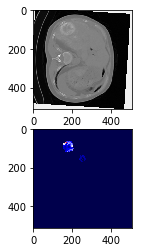

In [21]:

mask = (just_tumor > threshold)*1

masked_img = just_tumor * mask

slice_num = 29
plt.subplot(211)
plt.imshow(ct_data[:,:,slice_num],cmap=cm.gray)
plt.subplot(212)
plt.imshow(masked_img[:,:,slice_num], cmap=cm.seismic)
plt.show()

np.save('Lipiodol_mask.npy', mask, allow_pickle=True, fix_imports=True)

In [22]:
# proportion of tumor that is lipiodol
num_past_thres = sum(flat_tumor > threshold)

In [54]:
filename = BASE_DIR + 'ENHANCE.ids'
mask = np.transpose(mask, (2,1,0))
mask = mask*255
mask = mask.astype('uint8')
mask = mask[:,::-1,:]
with open(filename, 'w') as f:
# The Numpy tofile object always write 'C' order, whereas
# qEASL uses Fortran order, thus we must transpose the array.
    mask.tofile(f)

In [50]:
np.sum(lol)

29525430

In [46]:
lol = np.transpose(lol, (2,1,0))

In [48]:
with open('ENHANCE.ids', 'rb') as f:
    lol = f.read()
lol = np.fromstring(lol, dtype='uint8')
lol = np.reshape(lol, (ct_data.shape[2], ct_data.shape[1], ct_data.shape[0]))
lol = np.transpose(lol, (2,1,0))
lol = lol[:,::-1,:]
lol[lol > 0] = 1

In [43]:
tumor.shape

(512, 512, 64)

In [42]:
tumor = np.transpose(tumor, (2,1,0))

In [ ]:
with open(tumor_mask_file, 'rb') as f:
    tumor = f.read()
tumor = np.fromstring(tumor, dtype='uint8')
tumor = np.reshape(tumor, (ct_data.shape[2], ct_data.shape[1], ct_data.shape[0]))
tumor = np.transpose(tumor, (2,1,0))
tumor = tumor[:,::-1,:]
tumor[tumor > 0] = 1